# Midterm - DS3000A

## Student ID: XXXXXXXXX (XX / 100)

## General comments

This Midterm integrates knowledge and skills acquired in the first half of the semester, especially in the Assignments. 
You are allowed to use any document and source on your computer and look up documents on the internet. **You are NOT allowed to share documents, or communicate in any other way with people inside or outside the class during the midterm.** 
To finish the midterm in the alloted 2 hrs, you will have to work efficiently. **Read the entirety of each question carefully.** 

You need to submit the midterm by the due date (10:30 am) on OWL in the Assignment/Midterm section where you downloaded the data set and notebook. Late submission will be scored with 0 pts, unless you have received extra accommodation. 
To avoid technical difficulties, start your submission at latest five to ten minutes before the deadline. To be sure, you can also submit multiple version - only the latest version will be graded.  

Some question demand a **written answer** - answer these in a full English sentence. 

For your Figures, ensure that all axes are labeled in an informative way. 

Ensure that your code runs correctly by choosing "Kernel -> Restart and Run All" before submitting. 


Good luck!

## Preliminaries
Sets up the environment by importing pandas, numpy, matplotlib, searborn, sklearn, scipy.
No other packages are allowed in solving the modterm.   

In [1]:
## Import libraries
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn as sk 
import scipy 

# Get individual functions from 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, plot_roc_curve
from scipy.stats import norm

## Dataset

This dataset ("ExamData") is a subset of a dataset which contains years of daily observations of the weather at many geographical locations across a country.

The main purpose of the dataset was to predict Raining on a day as a "Yes" or "No". 
When the rain was 1 mm or more the answer is "Yes", and "No" otherwise. 
The Observations were drawn from numerous weather stations. 

The sourse of observations and all definitions is http://www.bom.gov.au/climate/data.

The variables are ientified as follows:

1. Date - The date string of the recorded information (year-month-day) 
2. MinTemp - Minimum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree (degrees Celsius).
3. MaxTemp - Maximum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree (degrees Celsius).
4. Rainfall - Precipitation (rainfall) in the 24 hours to 9am. Sometimes only known to the nearest whole millimetre (millimetres).
5. Evaporation - "Class A" pan evaporation in the 24 hours to 9am (milimeters).
6. Sunshine - Bright sunshine in the 24 hours to midnight (hours).
7. WindGustSpeed - Speed of strongest wind gust in the 24 hours to midnight (killometers per hour).
8. WindDir - Direction of strongest wind gust in the 24 hours to midnight (4 compass points North, South, East, West).
9. WindSpeed9am - Wind speed averaged over 10 minutes prior to 9 am (killometers per hour).
10. WindSpeed3am - Wind speed averaged over 10 minutes prior to 3 pm (killometers per hour).
11. Humidity - Relative humidity (percent).
12. Pressure9am - Atmospheric pressure reduced to mean sea level at 9 am (hectopascals).
13. Pressure3pm - Atmospheric pressure reduced to mean sea level at 3 pm (hectopascals).
14. Cloud9am - Fraction of sky obscured by cloud at 9 am (eighths).
15. Cloud3pm - Fraction of sky obscured by cloud at 3 pm (eighths).
16. Temp9am - Temperature at 9 am (degrees Celsius).
17. Temp3pm - Temperature at 3 pm (degrees Celsius).
18. RainToday - Raining today ("Yes"/"No").
19. RainTomorrow - Raining tomorrow ("Yes"/"No").

With this information, answer the following questions using your knowledge from the course.


## Question 1: Linear Regression - Predicting the amount of Rainfall (30 pts)

### Q1.1: Data loading (X / 3 pts)

Load the dataset and store it in a dataframe. Preview the data and the basic statistics for all variables. 

**Written answer:** How many cases are there? Are there any null values?

In [100]:
data=pd.read_csv('ExamData.csv')
data.describe(), data.shape, data.dropna(axis=0), data.shape

(          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
 count  907.000000  907.000000  907.000000   907.000000  907.000000   
 mean    13.414333   23.428335    4.402867     5.105072    7.054686   
 std      6.417740    7.261593   11.423447     3.410964    3.962936   
 min     -2.500000    7.200000    0.000000     0.000000    0.000000   
 25%      8.600000   17.200000    0.000000     2.600000    3.800000   
 50%     12.900000   23.500000    0.000000     4.400000    7.800000   
 75%     18.500000   29.500000    4.200000     7.000000   10.300000   
 max     29.700000   42.900000  168.400000    22.800000   13.800000   
 
        WindGustSpeed  WindSpeed9am  WindSpeed3pm    Humidity  Pressure9am  \
 count     907.000000    907.000000    907.000000  907.000000   907.000000   
 mean       43.628445     17.275634     20.678060   53.879824  1016.186880   
 std        14.703012      8.924449      8.995093   21.092195     7.214124   
 min        15.000000      2.000000      2.0000

<b>*Written answer:*</b>: There are 907 cases and there are no null values

### Q 1.2: Preprocessing - Data cleaning (X / 5 pts)
* Drop the variables: 'RainToday','RainTomorrow'.

* Use "Date" variable to find the numerical variable 'Month'. Therefore, you will have an additional column 'Month' (NOTE: use Pandas library to convert 'Date' into **datetime** format and extract 'Month' variable). Then dummmy code "Month" and drop the variable "Date". 
* Find the catecorical variables and Dummy code them (One Hot Encoding). **Because in this question we are using non-regularized models, drop the first column for each variable.**

<b>Written answer</b>: How many new variables have you just created?  12 variables, 1 for each months

In [101]:
data=data.drop(['RainToday','RainTomorrow'],axis=1)
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
#not sure how to extract the month from datatime as a string/number. I can only get it as a timestamp
data['Month'] = pd.DatetimeIndex(data['Date']).month
data.describe(), data.shape, data.dropna(axis=0), data.shape
data.drop(['Date'],axis=1)
data=pd.get_dummies(data,drop_first=True,columns=['Month'])
data.describe(), data.shape, data.dropna(axis=0), data.shape


(          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
 count  907.000000  907.000000  907.000000   907.000000  907.000000   
 mean    13.414333   23.428335    4.402867     5.105072    7.054686   
 std      6.417740    7.261593   11.423447     3.410964    3.962936   
 min     -2.500000    7.200000    0.000000     0.000000    0.000000   
 25%      8.600000   17.200000    0.000000     2.600000    3.800000   
 50%     12.900000   23.500000    0.000000     4.400000    7.800000   
 75%     18.500000   29.500000    4.200000     7.000000   10.300000   
 max     29.700000   42.900000  168.400000    22.800000   13.800000   
 
        WindGustSpeed  WindSpeed9am  WindSpeed3pm    Humidity  Pressure9am  \
 count     907.000000    907.000000    907.000000  907.000000   907.000000   
 mean       43.628445     17.275634     20.678060   53.879824  1016.186880   
 std        14.703012      8.924449      8.995093   21.092195     7.214124   
 min        15.000000      2.000000      2.0000

<b>*Written answer:*</b>

### Q 1.3: Visualization (X / 4 pts)

Plot the joint distribution between the Rainfall and the MinTemp and show the marginal distributions of those two variables as well. [2 pts]<br/>

<b>Written answer</b>: How would you characterize the distribution of `Rainfall`? Is there a relationship between those two variables? Describe their correlation? [2 pts]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'rainfall Vs minimum temperature')

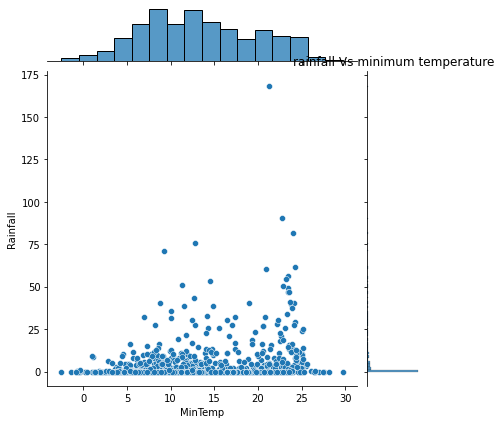

In [96]:
sns.jointplot(data.MinTemp,data.Rainfall)
plt.title('rainfall Vs minimum temperature')

<b>*Written answer:*</b>  There is a mild corrleation between rainfall and minimum temperture and there is a slight skew between temperature of 5-30.

### Q 1.4 Transformation (X / 4 pts)

Logarithm transformation is one of the most commonly used mathematical transformations in feature engineering to approximate the distribution close to normal. Given the distribution of the Rainfall variable, use the logarithm of the Rainfall instead of the original variable as a new target variable and add to the dataset (name it ```LogRainfall```) where $LogRainfall = log(Rainfall + 1)$. (You add 1 because the data you apply log transform must have only positive values). 

Plot the joint distribution of the new variable ```LogRainfall``` and the MinTemp. <br> [2 pts]

<b>Written answer</b>: Describe how their correlation is changed now. Was this transformation effective?Why? [2 pts]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'rainfall Vs minimum temperature')

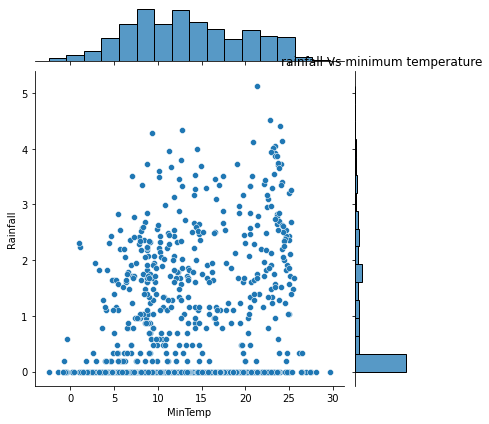

In [86]:
LogRainFall=np.log(data.Rainfall+1)
sns.jointplot(data.MinTemp,LogRainFall)
plt.title('rainfall Vs minimum temperature')

<b>*Written answer:*</b> The previous mild correlation became much more obivous after undergoing the log transform.

### Q 1.5: Regression Analysis (X / 14 pts)

Use the above two target variables ```Rainfall``` and ```LogRainfall``` to create **two** linear regression models and compare their prediction performance as follows:

a) Split the train and test subsets using 30% of the data as the test set. Use a `random_state` of 1 if using `train_test_split`. [1 pts]

b. Create the first linear regression model using all variables as features ```X``` and the Rainfall variable as target variable ```y``` without transformation. [6 pts]

c. Create the second linear regression model using all variables as features ```X``` and the log-transformed Rainfall variable ```y``` . [3 pts]

d. Calculate and report the mean absolute error of both models when predicting the variable `Rainfall` in the test set. [2 pts]
*NOTE* Make sure you transform the prediction of the model in (c) from log(Rainfall) to Rainfall before error calculation! 

**Written answer:** Which one is the most accurate model? Why? [2 pts]

In [87]:
X = data.drop(["Rainfall"], axis=1)
y = data.Rainfall
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

log_y_train=np.log(y_train+1)

#This would work with the month being in a float but I couldn't figure out how to convert timestamp object
model_b= LinearRegression().fit(X_train,y_train)
model_c= LinearRegression().fit(X_train,log_y_train)

b_pred_y=model_b.predict(X_test)
c_pred_y=np.exp(model_c.predict(X_test))-1

mae_b=mean_absolute_error(b_pred_y,y_test)
mae_c=mean_absolute_error(c_pred_y,y_test)

print(f"mean absolute error for Rainfall: {mae_b} \n  mean absolute error for Log rainfall:{mae_c}")

TypeError: ignored

<b>*Written answer:*</b>

## Question 2: Regularized model (35 points)

In this question we will build a reqularized regression model and observe the effect of regularization. **Evaporation** will be used as target variable.

### Q 2.1 (X / 2 pts)
Reload the original dataset again.
Use the `Date` variable to extract `Month` numerical variable. 
Repeat the preprocessing in Q 1.2 but do NOT dummy code month and keep it as one numerical column. 


In [ ]:
data = pd.read_csv('ExamData.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Month'] = pd.DatetimeIndex(data['Date']).month
data= pd.getdummies(data, drop_first=False, columns=['Month'])


### Q 2.2 (X / 10 pts)
Fourier Transform is a reasonable option to encode periodic data. 

Write a function `FourierExpansion(x,order)`, which takes a variable `x` scaled between 0 and 1 (scale by dividing to the maximum value), and returns a design matrix that has order times 2 columns. The first 2 columns should be set to: 

$sin(2 \pi x)$

$cos(2 \pi x)$

The next two columns: 

$sin(4 \pi x)$

$cos(4 \pi x)$

$...$

and the last two columns: 

$sin(2 order \pi x)$

$cos(2 order \pi x)$


In [77]:
def FourierExpansion(x,order):
   multiplier = x*2*np.pi
   s = []
   for i in range(order):
        t = [np.sin((i+1)*multiplier), np.cos((i+1)*multiplier)]
        s.append(t[0])
        s.append(t[1])
   return np.array(s).T


### Q 2.3 (X / 12 pts)
Now generate two different design matrices (models) to model the variation of `Evaporation` across the `Month` of the year. 
* Model 1: use your function from Question 2.2 to generate a Fourier set (order 6) for month. Make sure you scale month between 0 and 1 before submitting to the function. Remove column 2 after fourier expansion.[3 pts]
* Model 2: use `pd.get_dummies` to generate a dummy or one-hot encoding of Month. Because we will use this for an unregualized model, make sure you drop the first column.[3 pts]  

Fit the two unregularized linear model to the data and report the the $R^2$ value for 
both models[4 pts]. If you have done everything correctly, the $R^2$ values should be identical. Why is this? [2 pts] *Hint*: How many columns are in each design matrix and how many Month in the year are there?  


In [ ]:
model_1=FourierExpansion(data.Month/12,6)
model_2=pd.getdummies(data, drop_first=True, columns=['Month'])

model_1.fit()



<b>*Written answer:*</b>

### Q 2.4 (X / 11 pts)
a) Modify your dummy encoding model (Model 2 from Q2.3), by **NOT dropping** the first column. This design matrix should have 12 regressors now. [1 pts]

b) Build a pipeline, which first applies z-Standardization to each column of the design matrix and then fit an L2-regularlized linear model.[2 pts] 

c) Do a grid search, varying the regularization parameter between $exp(-5)$ and $exp(4)$ in 10 steps for the fourier-encoded model, (Model 1 from Q2.3). Evaluate each setting of $\lambda$ using the mean-squared-error with 10-fold cross-validation. Plot the average validation error (y-axis) against $log(\lambda)$ (x-axis). (*Hint: If you did not succeed in generating a fourier feature set, use `polynomialFeatures` to make a polynomial feature set for month of order 11.*) [3 pts]

d) Repeat (c), this time using the dummy-coded feature set (modified Model 2 from Q2.3, in part a of this question). Plot the average validation error with a different color in the same plot as part (c), so you can compare the models. [2 pts]

e) Report the $\lambda$ value for each model that gives the best validation error. [2 pts]

**Written answer:** Why don't the two models behave the same way, as they did in Q2.3? [1 pts]

In [ ]:
model_2=pd.getdummies(data, drop_first=False, columns=['Month'])

pipeline = Pipeline([
    ("standardize", StandardScaler()),
    ('reg', sk.linear_model.LinearRegression() )
])

params = {'reg__alpha': np.exp(np.linspace(-8,6,15))}
gscv = GridSearchCV(pip, param_grid=params, cv=10, scoring = 'neg_mean_squared_error', refit=True)
gscv.fit(X_new_train, ytrain)

results = pd.DataFrame(gscv.cv_results_)

plt.scatter( np.linspace(-8, 6,15), -results.mean_test_score)
plt.xlabel(r'$\log(\lambda)$')


<b>*Written answer:*</b>

## Question 3: Logistic regression classifier - predict if it rains tomorrow (35 points)

### Q 3.1 (X / 2 pts)
Reload the original dataset again. 
* Use the `Date` variable to extract `Month` numerical variable (similar to Q 1.2).

* Dummmy code "Month" and drop the variable "Date". 

* Dummy code all catecorical variables (Except "RainTomorrow"). **Drop the first column for each variable.**



In [103]:
data = pd.read_csv("ExamData.csv")
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Month'] = pd.DatetimeIndex(data['Date']).month
data.drop(['Date'],axis=1)
data= pd.get_dummies(data, drop_first=False, columns=['Month'])
data=pd.get_dummies(data,drop_first=True,columns=['WindDir','RainToday'])


### Q 3.2 Declare feature vector and target variable (X / 4 pts)

* Use "RainTomorrow" as target variable with "Yes" and "No" labels. How many observations we have for each category?(*Hint:* sum the number of 1's per boolean variable over the rows of the dataset).

907 

In [111]:
data["major"] = data['RainTomorrow'].eq('Yes').mul(1)

rainfall_major=sum([1 for x in data['major'].values if x])

print(f"There are {rainfall_major}")


There are 332


### Q 3.3: Classification (X / 15 pts) 

Your objective is to train a logistic regression. For this:

a. Create a train / test split of the dataset reserving 30% for the test set. Use `random_state = 1` if using `train_test_split`. [1 pts]

b. Create a pipeline that first normalizes your training data and then trains a logistic regression **using Ridge penalty with a tolerance of 0.0001 and sufficient iterations for the model to converge. Use a C of 1 (Ridge parameter)**. [5pts]

c. Fit the model to the training data. Show the coefficients and what variable they are related to. [5pts]. 

**Written answer:** Based on these coefficients, which variable has the largest influence on the prediction[1pts]? In the context of this model, does MinTemp lead to lower or higher chance of raining tomorrow [1pts]? How important is the influence of the day before (RainToday) on the target (RainTomorrow)[1pts]? What is the influence of the wind direction (WindDir) on the prediction[1pts]?

In [114]:
X = data.drop(["major"], axis=1)
y = data.major.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=1)

pipeline = Pipeline([
    ("standardize", StandardScaler()),
    ("logistic_regression", LogisticRegression( C=1, tol=0.0001))
])

#same issue with the float/timestamp conversion
pipeline.fit(X_train, y_train)

coefs = pipeline.named_steps['logistic_regression'].coef_    
ind = list(X)
print("Covariate:", "Coef")
for i in range(len(ind)):
    print(ind[i],":", coefs[0][i])


TypeError: ignored

<b>*Written answer:*</b>

### Q 3.4: Evaluate your model. (X / 14 pts)

Now we will begin evaluating our model. Apply the model to the test set. 

a) Report the the first 10 **predicted labels** and the **probabilities** for the target variable RainTomorrow ("Yes" and "NO") in an array form [5 pts].

b) Report the accuracy, precision and confusion matrix using the test data (leave the default cutoff of 0.5) [6 pts].

c) Plot the ROC curve, and calculate the AUC. What does that value indicate about the performance of your classification model?[3 pts]


In [115]:
# Accuracy: 1 if match, 0 if not. Take sum and get the average of it
pred_y = pipeline.predict(X_test)

# Add that function from the logistic regression lab:
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

compute_performance(pred_y, y_test, pipeline.named_steps['logistic_regression'].classes_)


pred_y_proba = pipeline.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, pred_y_proba[:,1], pos_label=1)
AUC = auc(fpr, tpr)
plot_roc_curve(pipeline, X_test, y_test)
print("AUC:",AUC)

TypeError: ignored

<b>*Written answer:*</b>